In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [2]:
# --- CONFIG ---
DATASET_DIR = "../content/dataset"
CLASSES = ["Hemorrhagic", "Ischemic", "Tumor"]
# --------------

def perform_eda():
    class_counts = {}
    shapes = []
    
    # 1. Setup Plot
    fig, axes = plt.subplots(len(CLASSES), 5, figsize=(15, 8))
    fig.suptitle("Random Samples per Class", fontsize=16)

    # 2. Iterate through classes
    for i, cls in enumerate(CLASSES):
        cls_path = os.path.join(DATASET_DIR, cls)
        images = glob(os.path.join(cls_path, "*"))
        
        # Count files
        class_counts[cls] = len(images)
        
        # Check Shapes (sample first 100 to save time)
        for img_path in images[:100]:
            img = cv2.imread(img_path)
            if img is not None:
                shapes.append(img.shape)

        # Plot 5 random samples
        sample_images = np.random.choice(images, 5, replace=False)
        for j, img_path in enumerate(sample_images):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(cls, fontsize=12, fontweight='bold', x=-0.5, y=0.5)

    plt.tight_layout()
    plt.show()

    # 3. Print Statistics
    print("\n--- DATASET STATISTICS ---")
    total_images = sum(class_counts.values())
    for cls, count in class_counts.items():
        percentage = (count / total_images) * 100
        print(f"{cls}: {count} images ({percentage:.1f}%)")
    
    # Shape Analysis
    widths = [s[1] for s in shapes]
    heights = [s[0] for s in shapes]
    print(f"\nAverage Image Size: {int(np.mean(widths))} x {int(np.mean(heights))}")
    print(f"Max Size: {np.max(widths)} x {np.max(heights)}")
    print(f"Min Size: {np.min(widths)} x {np.min(heights)}")

    # 4. Bar Chart for Distribution
    plt.figure(figsize=(6,4))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette='viridis')
    plt.title("Class Distribution")
    plt.ylabel("Number of Images")
    plt.show()

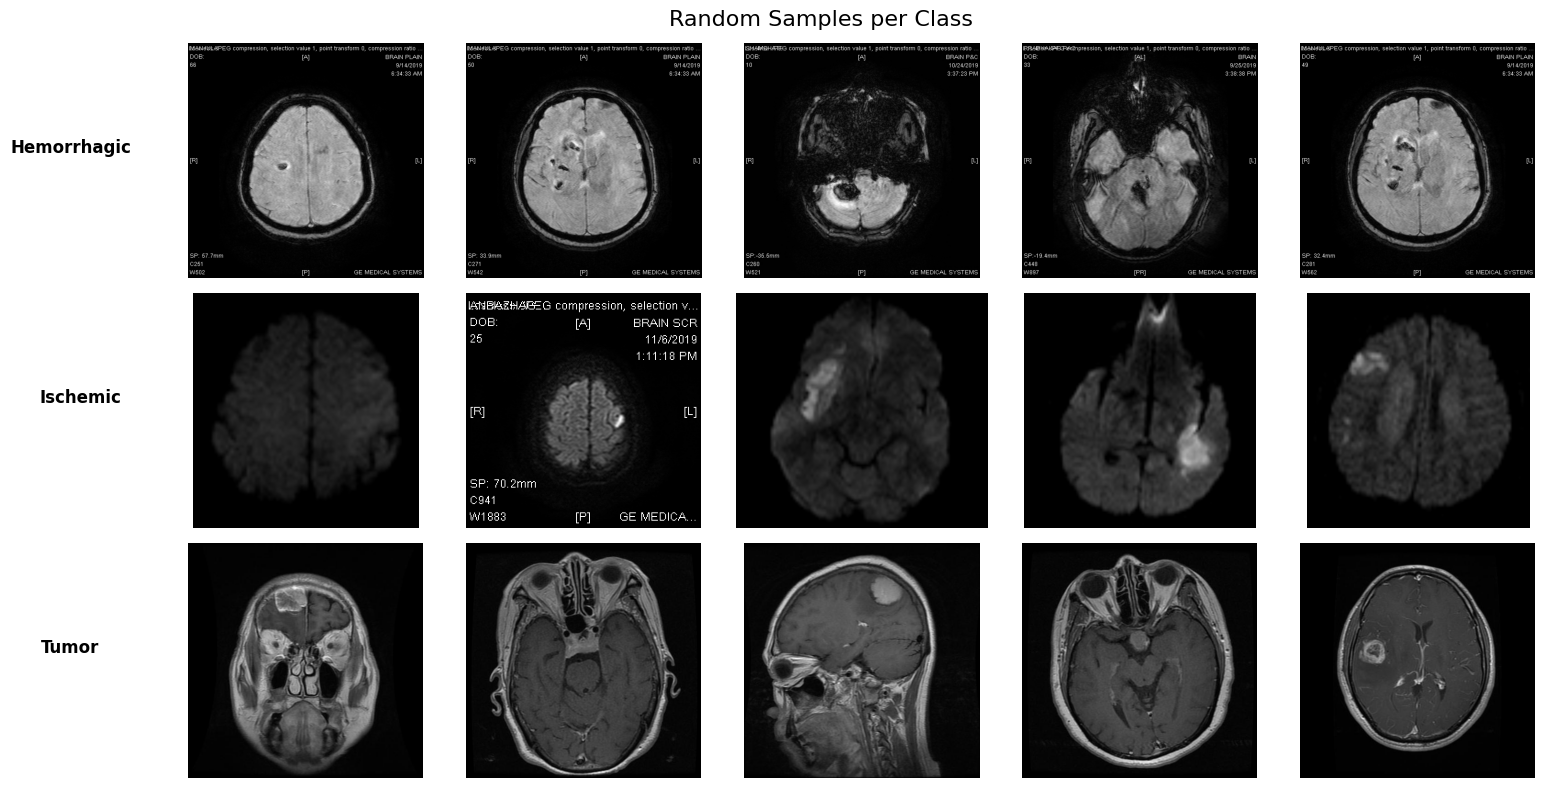


--- DATASET STATISTICS ---
Hemorrhagic: 186 images (6.6%)
Ischemic: 171 images (6.0%)
Tumor: 2475 images (87.4%)

Average Image Size: 499 x 507
Max Size: 692 x 681
Min Size: 256 x 256


C:\Users\yusuf\AppData\Local\Temp\ipykernel_9628\1239916740.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette='viridis')


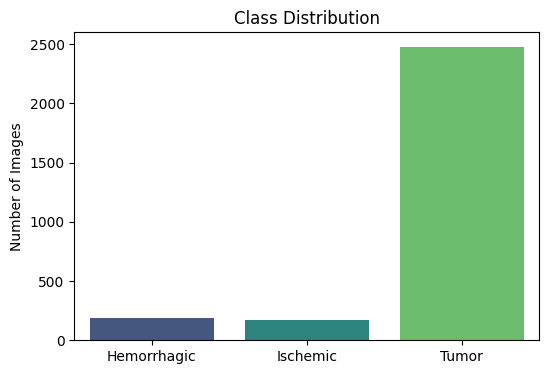

In [3]:
perform_eda()